In [1]:
import pickle
import matplotlib.pyplot as plt

with open('bert_results_1-4.pkl', 'rb') as f:
    results = pickle.load(f)

with open('bert_results_20_percent.pkl', 'rb') as f:
    r20 = pickle.load(f)

In [2]:
preds = results['preds']
true = results['true']
masked = results['masked']

preds20 = r20['preds']
true20 = r20['true']
masked20 = r20['masked']

In [3]:
def count_char_occurrences(string, char):
    count = 0
    for c in string:
        if c == char:
            count += 1
    return count

def analyze_results(preds, true, m, masked_char = '¿'):

    total_correct = 0

    correct_by_num_missing = dict()
    correct_by_char_count = dict()
    total_by_char_count = dict()
    total_by_num_missing = dict()

    for i in range(len(preds)):
        pred = preds[i]
        label = true[i]
        masked = m[i]

        num_masked_chars = count_char_occurrences(masked, masked_char)

        if pred == label:
            total_correct += 1
            
            if num_masked_chars in correct_by_num_missing:
                correct_by_num_missing[num_masked_chars] += 1
            else:
                correct_by_num_missing[num_masked_chars] = 1
            
            if len(label) in correct_by_char_count:
                correct_by_char_count[len(label)] += 1
            else:
                correct_by_char_count[len(label)] = 1
        
        if num_masked_chars in total_by_num_missing:
            total_by_num_missing[num_masked_chars] += 1
        else:
            total_by_num_missing[num_masked_chars] = 1

        if len(label) in total_by_char_count:
            total_by_char_count[len(label)] += 1
        else:
            total_by_char_count[len(label)] = 1
    

    print(f'Total acc: {total_correct / len(preds)}')

    for key in correct_by_num_missing:
        print(f'Acc for words with {key} chars missing: {correct_by_num_missing[key] / total_by_num_missing[key]}')

    for key in correct_by_char_count:
        print(f'Acc for words with {key} chars in total: {correct_by_char_count[key] / total_by_char_count[key]}')
    
    print(f'# words with x chars missing: {total_by_num_missing}')


    return correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing



In [4]:
correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing = analyze_results(preds,true,masked)


Total acc: 0.8697890715827935
Acc for words with 1 chars missing: 0.86902010226238
Acc for words with 2 chars missing: 0.8763202204194092
Acc for words with 3 chars missing: 0.8994082840236687
Acc for words with 4 chars missing: 1.0
Acc for words with 11 chars in total: 0.9994318181818181
Acc for words with 8 chars in total: 0.9890876023037284
Acc for words with 5 chars in total: 0.9589691420820617
Acc for words with 4 chars in total: 0.7849764203907478
Acc for words with 3 chars in total: 0.6646318199160626
Acc for words with 7 chars in total: 0.9859510086455331
Acc for words with 6 chars in total: 0.9664589235127479
Acc for words with 12 chars in total: 0.9979899497487437
Acc for words with 2 chars in total: 0.42571376613929807
Acc for words with 10 chars in total: 0.9957208689927584
Acc for words with 9 chars in total: 0.9934372436423298
Acc for words with 13 chars in total: 1.0
Acc for words with 14 chars in total: 1.0
Acc for words with 1 chars in total: 0.3008130081300813
Acc for

In [5]:
correct_by_char_count

{11: 1759,
 8: 6526,
 5: 16968,
 4: 6991,
 3: 6968,
 7: 8211,
 6: 8529,
 12: 993,
 2: 2341,
 10: 3025,
 9: 4844,
 13: 504,
 14: 229,
 1: 148,
 15: 40,
 16: 5}

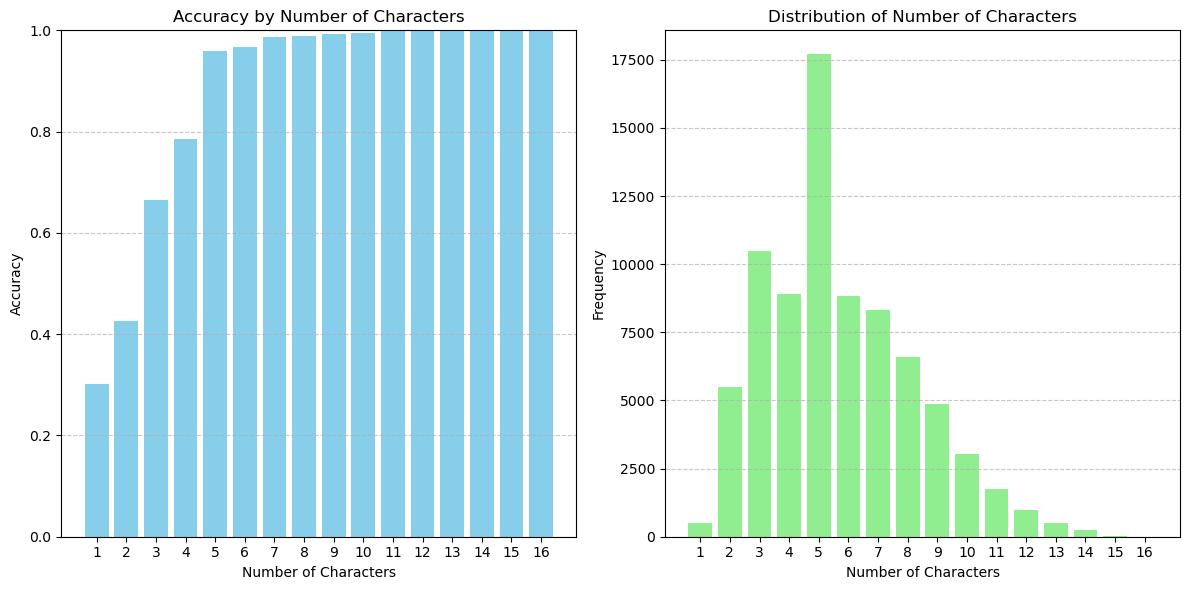

In [6]:
# Calculate accuracy for each number of characters
accuracies = {}
for char_count in correct_by_char_count:
    accuracy = correct_by_char_count[char_count] / total_by_char_count[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_char_count.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_char_count.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

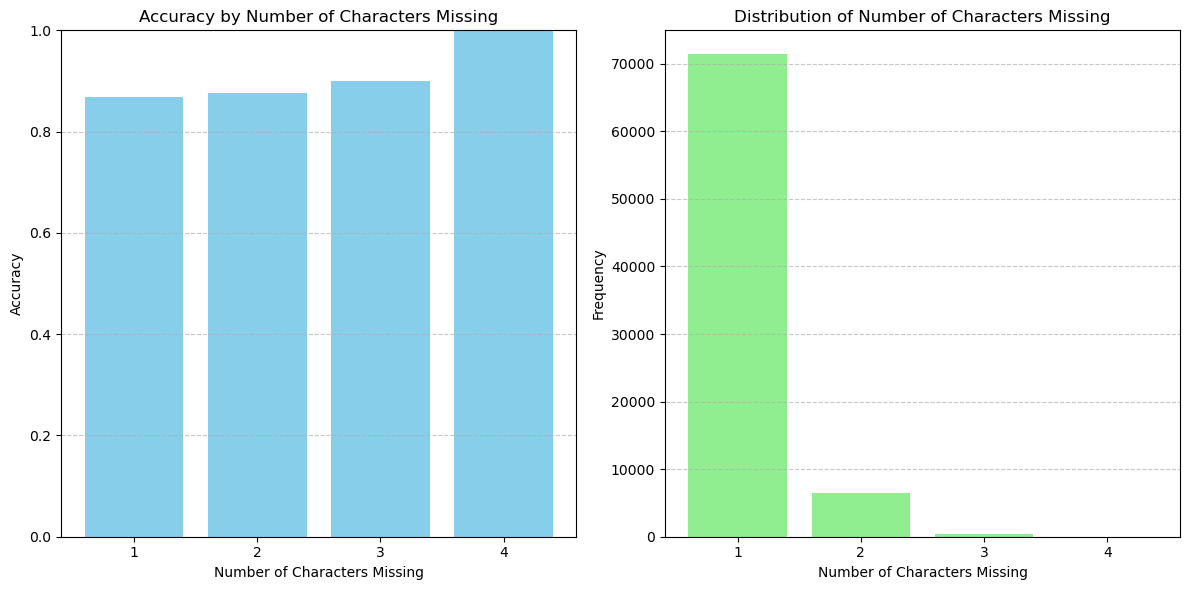

In [7]:
# Calculate accuracy for each number of characters missing
accuracies = {}
for char_count in correct_by_num_missing:
    accuracy = correct_by_num_missing[char_count] / total_by_num_missing[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters Missing')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_num_missing.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_num_missing.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters Missing')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [8]:
correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing = analyze_results(preds20,true20,masked20)

Total acc: 0.7139906418205912
Acc for words with 1 chars missing: 0.7134584018436709
Acc for words with 2 chars missing: 0.7013714967203339
Acc for words with 3 chars missing: 0.7463639062036213
Acc for words with 5 chars missing: 0.7480748074807481
Acc for words with 4 chars missing: 0.7623126338329764
Acc for words with 6 chars missing: 0.7974683544303798
Acc for words with 7 chars missing: 0.85
Acc for words with 8 chars missing: 0.75
Acc for words with 8 chars in total: 0.9509163802978235
Acc for words with 3 chars in total: 0.4248526774276198
Acc for words with 11 chars in total: 0.991995868835528
Acc for words with 10 chars in total: 0.9866833125260092
Acc for words with 5 chars in total: 0.8826172769886864
Acc for words with 7 chars in total: 0.9273309947598631
Acc for words with 4 chars in total: 0.5511496717579916
Acc for words with 6 chars in total: 0.8796917262588462
Acc for words with 9 chars in total: 0.973480110082562
Acc for words with 12 chars in total: 0.99032414126753

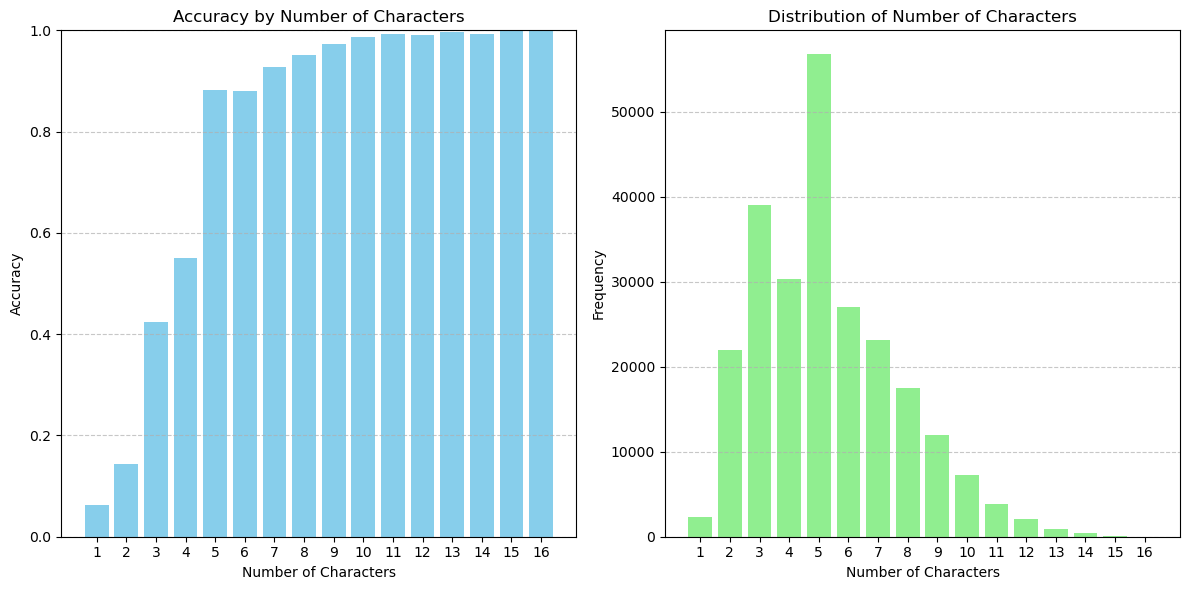

In [9]:
# Calculate accuracy for each number of characters
accuracies = {}
for char_count in correct_by_char_count:
    accuracy = correct_by_char_count[char_count] / total_by_char_count[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_char_count.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_char_count.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

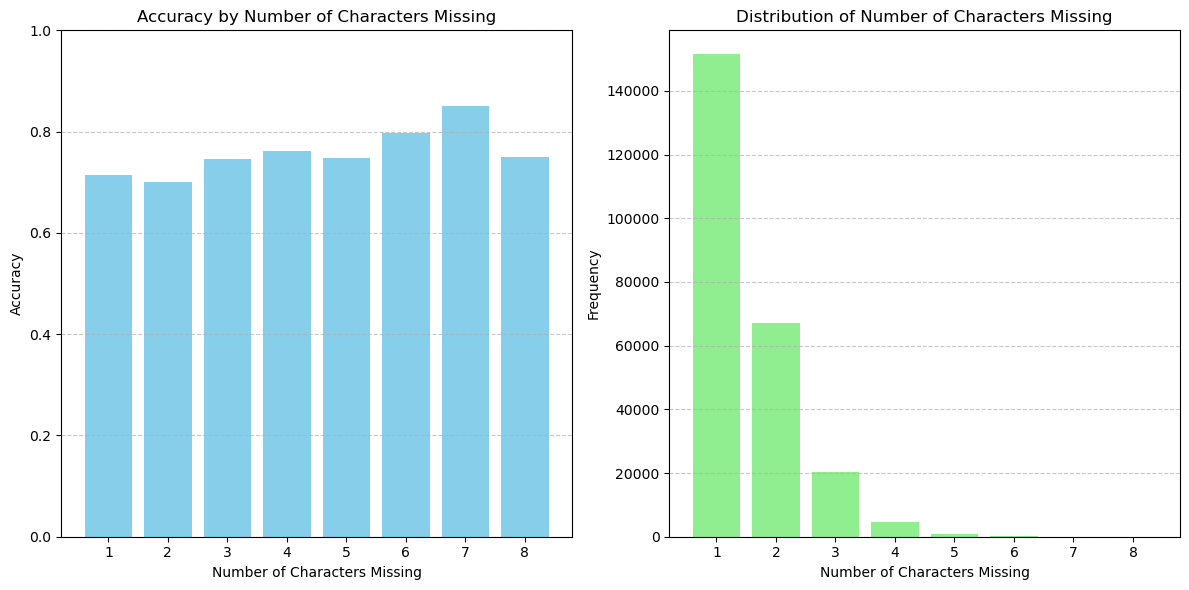

In [10]:
# Calculate accuracy for each number of characters missing
accuracies = {}
for char_count in correct_by_num_missing:
    accuracy = correct_by_num_missing[char_count] / total_by_num_missing[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters Missing')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_num_missing.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_num_missing.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters Missing')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()